# Import Modules and Load Dataset

### Import Modules

In [1]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn import linear_model, tree, ensemble
from warnings import simplefilter
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTENC, SMOTE

### Load Dataset, Shuffle Dataset

In [2]:
df_base = pd.read_csv("BaseCrimeDemoDataset-v1.1.csv")
df_base = df_base.sample(frac=1)

### Data Duplication for experiment

In [3]:
# frames = [df_base, df_base.sample(frac=.10)]
# df_base = pd.concat(frames)

### Exploring Dataset

In [4]:
df_base

,id,incident_year,incident_month,incident_week,incident_weekday,weekend,part_of_the_day,latitude,longitude,incident_place,...,police_station,cyber_cafe,school,college,cinema,District,Upazilla,FixedLoca,crime,news_link
5621,C_5621,2018,5,20,thursday,0,morning,23.816700,90.150000,singiar,...,2,0,23,2,0,manikganj,singair,singiar,bodyfound,https://www.thedailystar.net/city/man-found-de...
5969,C_5969,2015,9,38,friday,1,night,23.996158,90.419726,gazipur sadar,...,2,22,100,8,8,gazipur,gazipur sadar,gazipur sadar,kidnap,https://www.thedailystar.net/country/abducted-...
11,C_11,2018,11,45,sunday,0,morning,23.913894,90.320686,ashulia,...,6,16,42,10,3,dhaka,savar,savar,murder,https://www.thedailystar.net/city/news/man-sho...
1433,C_1433,2016,3,13,thursday,0,morning,22.316670,91.816670,banshkhali,...,6,0,25,4,0,chattogram,banshkhali,banshkhali,bodyfound,https://www.thedailystar.net/city/missing-boy-...
1178,C_1178,2019,4,16,thursday,0,night,22.316670,91.816670,boalkhali,...,3,3,29,3,0,chattogram,boalkhali,boalkhali,murder,https://www.thedailystar.net/city/news/woman-f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5233,C_5233,2016,2,6,tuesday,0,morning,24.775000,88.670000,manda,...,1,14,74,11,1,naogaon,manda,manda,bodyfound,https://www.thedailystar.net/country/man-found...
854,C_854,2015,8,32,thursday,0,night,23.858330,90.266670,savar,...,6,16,42,10,3,dhaka,savar,savar,bodyfound,https://www.thedailystar.net/city/schoolboy-fo...
526,C_526,2016,5,18,saturday,1,morning,23.728907,90.417137,nawabpur,...,60,478,242,64,40,dhaka,dhaka metropolitan,dhaka metropolitan,assault,https://www.thedailystar.net/city/cop-stabbed-...
2859,C_2859,2009,9,36,tuesday,0,night,24.933300,90.602800,purbadhala,...,2,0,29,5,3,netrakona,purbadhala,purbadhala,murder,https://www.thedailystar.net/country/news/man-...


In [5]:
df_base.columns

Index(['id', 'incident_year', 'incident_month', 'incident_week',
       'incident_weekday', 'weekend', 'part_of_the_day', 'latitude',
       'longitude', 'incident_place', 'incident_district', 'incident_division',
       'max_temp', 'avg_temp', 'min_temp', 'weather_code', 'precip',
       'humidity', 'visibility', 'cloudcover', 'heatindex', 'season',
       'weather_description', 'weather', 'distance_btn_areas',
       'distance_btn_dist', 'household', 'male_population',
       'female_population', 'total_population', 'gender_ration',
       'average_household_size', 'density_per_kmsq', 'literacy_rate',
       'religious_institution', 'playground', 'park', 'police_station',
       'cyber_cafe', 'school', 'college', 'cinema', 'District', 'Upazilla',
       'FixedLoca', 'crime', 'news_link'],
      dtype='object')

### Dataframe Column Dictionary for droping column

In [6]:
df_columns_dictionary = {
    'id':0,
    'incident_year':0,
    'incident_month':1,
    'incident_week':1,
    'incident_weekday':1,
    'weekend':1,
    'part_of_the_day':1,
    'latitude':1,
    'longitude':1,
    'incident_place':1,
    'incident_district':1,
    'incident_division':1,
    'max_temp':1,
    'avg_temp':1,
    'min_temp':1,
    'weather_code':1,
    'precip':1,
    'humidity':1,
    'visibility':1,
    'cloudcover':1,
    'heatindex':1,
    'season':1,
    'weather_description':0,
    'weather':1,
    'distance_btn_areas':1,
    'distance_btn_dist':1,
    'household':1,
    'male_population':1,
    'female_population':1,
    'total_population':1,
    'gender_ration':1,
    'average_household_size':1,
    'density_per_kmsq':1,
    'literacy_rate':1,
    'religious_institution':1,
    'playground':1,
    'park':1,
    'police_station':1,
    'cyber_cafe':1,
    'school':1,
    'college':1,
    'cinema':1,
    'District':0, 
    'Upazilla':0,
    'FixedLoca':0,
    'crime':1,
    'news_link':0
}

### Droping Unnecessary Columns

In [7]:
df_base_col = df_base.columns
df = df_base.copy()
for item in df_base_col:
    if df_columns_dictionary[item] == 0:
        df.drop([item], axis = 1, inplace=True)

# Data Preparation

In [8]:
df

,incident_month,incident_week,incident_weekday,weekend,part_of_the_day,latitude,longitude,incident_place,incident_district,incident_division,...,literacy_rate,religious_institution,playground,park,police_station,cyber_cafe,school,college,cinema,crime
5621,5,20,thursday,0,morning,23.816700,90.150000,singiar,manikganj,dhaka,...,46.2,394,25,1,2,0,23,2,0,bodyfound
5969,9,38,friday,1,night,23.996158,90.419726,gazipur sadar,gazipur,dhaka,...,60.6,854,1,15,2,22,100,8,8,kidnap
11,11,45,sunday,0,morning,23.913894,90.320686,ashulia,dhaka,dhaka,...,68.0,1118,78,3,6,16,42,10,3,murder
1433,3,13,thursday,0,morning,22.316670,91.816670,banshkhali,chattogram,chattogram,...,37.4,718,13,1,6,0,25,4,0,bodyfound
1178,4,16,thursday,0,night,22.316670,91.816670,boalkhali,chattogram,chattogram,...,58.9,275,3,0,3,3,29,3,0,murder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5233,2,6,tuesday,0,morning,24.775000,88.670000,manda,naogaon,rajshahi,...,46.3,1602,0,0,1,14,74,11,1,bodyfound
854,8,32,thursday,0,night,23.858330,90.266670,savar,dhaka,dhaka,...,68.0,1118,78,3,6,16,42,10,3,bodyfound
526,5,18,saturday,1,morning,23.728907,90.417137,nawabpur,dhaka,dhaka,...,74.6,4289,99,17,60,478,242,64,40,assault
2859,9,36,tuesday,0,night,24.933300,90.602800,purbadhala,netrokona,mymensingh,...,42.8,440,29,0,2,0,29,5,3,murder


In [9]:
df.columns

Index(['incident_month', 'incident_week', 'incident_weekday', 'weekend',
       'part_of_the_day', 'latitude', 'longitude', 'incident_place',
       'incident_district', 'incident_division', 'max_temp', 'avg_temp',
       'min_temp', 'weather_code', 'precip', 'humidity', 'visibility',
       'cloudcover', 'heatindex', 'season', 'weather', 'distance_btn_areas',
       'distance_btn_dist', 'household', 'male_population',
       'female_population', 'total_population', 'gender_ration',
       'average_household_size', 'density_per_kmsq', 'literacy_rate',
       'religious_institution', 'playground', 'park', 'police_station',
       'cyber_cafe', 'school', 'college', 'cinema', 'crime'],
      dtype='object')

### List of Numerical and categorical Features

In [10]:
numerical_features = ['latitude', 'longitude', 'max_temp', 'avg_temp',
       'min_temp', 'precip', 'humidity', 'visibility',
       'cloudcover', 'heatindex', 'distance_btn_areas',
       'distance_btn_dist', 'household', 'male_population',
       'female_population', 'total_population', 'gender_ration',
       'average_household_size', 'density_per_kmsq', 'literacy_rate',
       'religious_institution', 'playground', 'park', 'police_station',
       'cyber_cafe', 'school', 'college', 'cinema']

In [11]:
categorical_features = ['incident_weekday', 'part_of_the_day', 'incident_place', 'incident_district', 'incident_division', 'weather_code', 'season', 'weather']
categorical_features_all = ['incident_month', 'incident_week','weekend', 'incident_weekday', 'part_of_the_day', 'incident_place', 'incident_district', 'incident_division', 'weather_code', 'season', 'weather']

### Utility: Encoding

In [12]:
def LabelEncoding(df, col_name):
    le = LabelEncoder()
    labels = le.fit_transform(df[col_name])
    mappings = {index: label for index, label in enumerate(le.classes_)}
    return labels, mappings

def OneHotEncoding(df, col_name):
    onehot_features = pd.get_dummies(df[col_name])
    df = pd.concat([df, onehot_features], axis = 1)
    return df

def DummyEncoding(df, col_name):
    dummy_features = pd.get_dummies(df[col_name], drop_first = True)
    df = pd.concat([df, dummy_features], axis = 1)
    return df

In [13]:
def ApplyEncoding(df, categorical_features):
    for item in categorical_features:
        try:
            df[item],_ = LabelEncoding(df,item)
        except:
            pass
    return df

In [14]:
def categorical_feature_index(df_, list_):
    columns = [item for item in df_.columns]
    ret_list = []
    for i in range(0,len(columns)):
        if columns[i] in list_:
            ret_list.append(i)
    return ret_list

### Utility: Scaling

In [15]:
def MinMaxScaling(df, numerical_features):
    # from sklearn.preprocessing import StandardScaler
    # scaler = StandardScaler()
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    for item in numerical_features:
        try:
            df[[item]] = scaler.fit_transform(df[[item]])
        except:
            pass
    return df

### Utility: Show Performance

In [16]:
def ModelPerformance(y_test,y_pred):
    from sklearn.metrics import confusion_matrix
    confusion = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:')
    print(confusion)
    print('\nAccuracy per Class:')
    accuracy = confusion.diagonal()/confusion.sum(axis=1)
    print(f"Assault: {accuracy[0]*100}")
    print(f"BodyFound: {accuracy[1]*100}")
    print(f"Kidnap: {accuracy[2]*100}")
    print(f"Murder: {accuracy[3]*100}")
    print(f"Rape: {accuracy[4]*100}")
    print(f"Robbery: {accuracy[5]*100}")

    #importing accuracy_score, precision_score, recall_score, f1_score
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))    
    print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
    print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
    print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

    print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
    print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
    print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

    print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
    print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
    print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
    from sklearn.metrics import classification_report
    print('Classification Report\n')
    print(classification_report(y_test, y_pred, target_names=['Assault', 'BodyFound', 'Kidnap', 'Murder', 'Rape', 'Robbery']))

### Utility: Feature Drop

In [17]:
def DropFeature(df, features):
    # df = df.drop(['incident_place', 'incident_district', 'FixedLoca'], axis = 1)
    for item in features:
        try:
            df = df.drop([item], axis = 1)
        except:
            pass
    return df

### Utility: Split Dataset

In [18]:
def SplitDataset(X,y,test_size = 0.20):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 0)
    return X_train, X_test, y_train, y_test

### Utility Prepare Dataset

In [20]:
def PrepareDataset(df_main, feature_drop=[]):
    df = df_main.copy()
    df = MinMaxScaling(df, numerical_features)
    df = ApplyEncoding(df, categorical_features)
    df = DropFeature(df, feature_drop)
    df['crime'],crime_codes = LabelEncoding(df,'crime')
    y = df.loc[:,'crime']
    X = df.drop(['crime'], axis=1)
    # return df
    return X,y

# Model SMOTEENC Oversampling

In [21]:
X,y = PrepareDataset(df)
X_resampled, y_resampled = SMOTENC(categorical_feature_index(X,categorical_features_all)).fit_resample(X,y)
X_train, X_test, y_train, y_test = SplitDataset(X_resampled,y_resampled, test_size = .10)

## All Feature

### Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier(n_estimators = 5000 ,criterion = 'entropy', random_state = 0)
classifier = RandomForestClassifier(n_estimators = 2000 ,criterion = 'gini', random_state = 0)
# classifier = RandomForestClassifier(n_estimators = 2000 ,criterion = 'log_loss', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2000, random_state=0)

Feature Importance:


<BarContainer object of 39 artists>

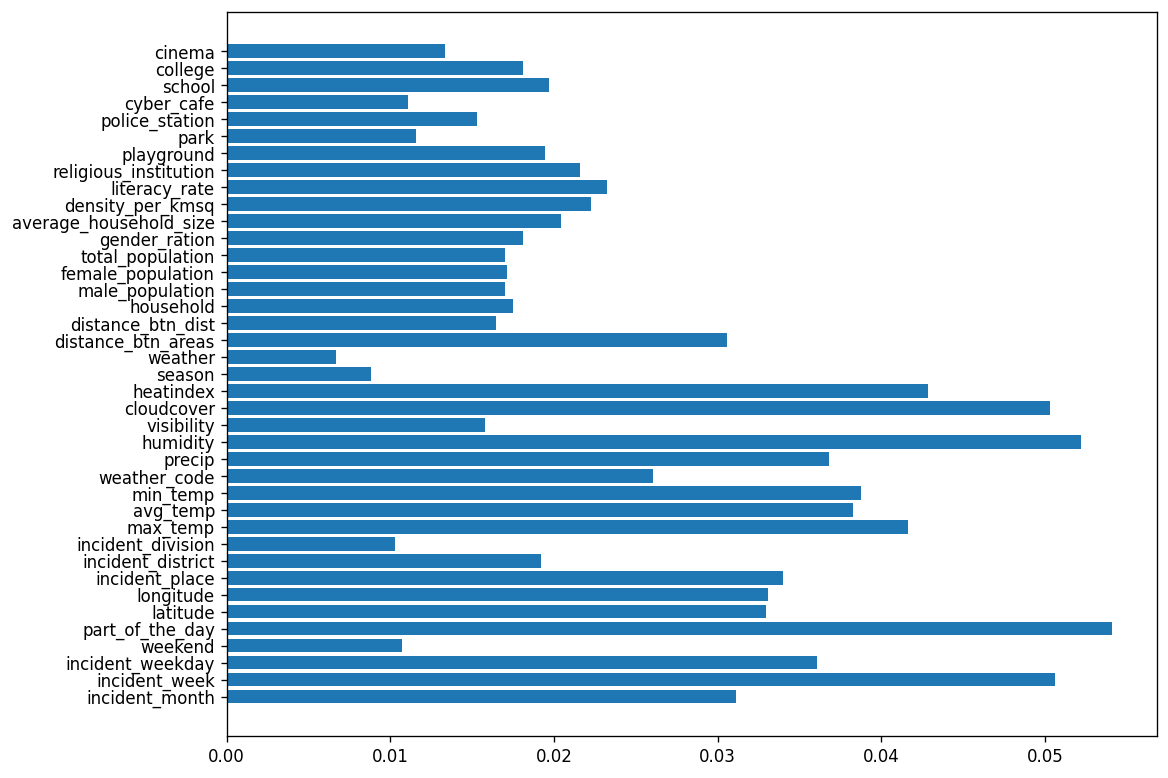

In [23]:
print("Feature Importance:")
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=120)
plt.barh(X.columns, classifier.feature_importances_)

In [24]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("***************************** Test Performance: *****************************\n")
ModelPerformance(y_test,y_pred)
print("\n***************************** Train Performance: *****************************\n")
ModelPerformance(y_train,y_train_pred)

***************************** Test Performance: *****************************

Confusion Matrix:
[[ 73  18  10  22  20  16]
 [ 20  73  15  16  14  11]
 [  7  13 104   9   7   6]
 [ 12  19   9  67  23  17]
 [ 16  16   8  22  78  10]
 [  5   3   5  10   9 128]]

Accuracy per Class:
Assault: 45.911949685534594
BodyFound: 48.99328859060403
Kidnap: 71.23287671232876
Murder: 45.57823129251701
Rape: 52.0
Robbery: 80.0

Accuracy: 0.57

Micro Precision: 0.57
Micro Recall: 0.57
Micro F1-score: 0.57

Macro Precision: 0.57
Macro Recall: 0.57
Macro F1-score: 0.57

Weighted Precision: 0.57
Weighted Recall: 0.57
Weighted F1-score: 0.57
Classification Report

              precision    recall  f1-score   support

     Assault       0.55      0.46      0.50       159
   BodyFound       0.51      0.49      0.50       149
      Kidnap       0.69      0.71      0.70       146
      Murder       0.46      0.46      0.46       147
        Rape       0.52      0.52      0.52       150
     Robbery       0.68

### Random Forest: max_depth = 30, min_sample_leaf = 10

In [25]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 2000, max_depth = 10, min_samples_leaf = 5, criterion = 'gini', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=2000,
                       random_state=0)

Feature Importance:


<BarContainer object of 39 artists>

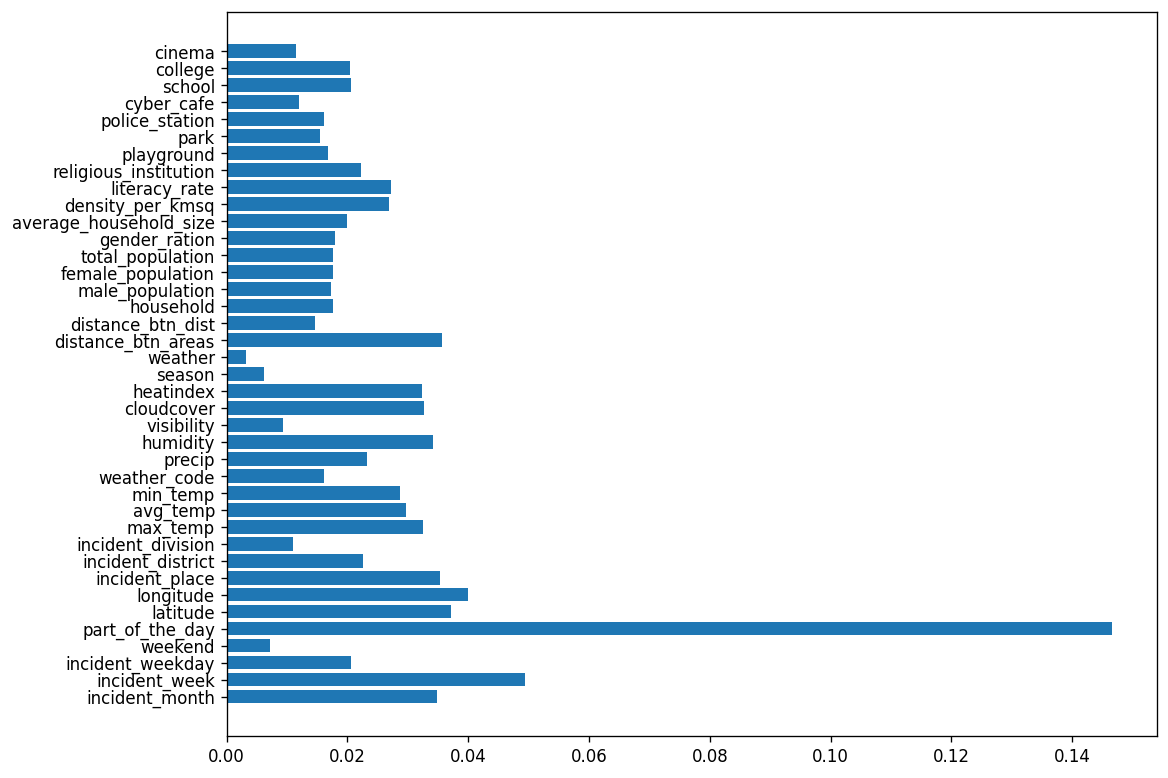

In [26]:
print("Feature Importance:")
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=120)
plt.barh(X.columns, classifier.feature_importances_)

In [27]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("***************************** Test Performance: *****************************\n")
ModelPerformance(y_test,y_pred)
print("\n***************************** Train Performance: *****************************\n")
ModelPerformance(y_train,y_train_pred)

***************************** Test Performance: *****************************

Confusion Matrix:
[[ 40  24  17  33  25  20]
 [  9  68  26  13  15  18]
 [  8  12  93   9  15   9]
 [  9  22   9  68  20  19]
 [ 11  18  14  31  54  22]
 [  5   8   4  23  13 107]]

Accuracy per Class:
Assault: 25.157232704402517
BodyFound: 45.63758389261745
Kidnap: 63.6986301369863
Murder: 46.25850340136054
Rape: 36.0
Robbery: 66.875

Accuracy: 0.47

Micro Precision: 0.47
Micro Recall: 0.47
Micro F1-score: 0.47

Macro Precision: 0.47
Macro Recall: 0.47
Macro F1-score: 0.46

Weighted Precision: 0.47
Weighted Recall: 0.47
Weighted F1-score: 0.46
Classification Report

              precision    recall  f1-score   support

     Assault       0.49      0.25      0.33       159
   BodyFound       0.45      0.46      0.45       149
      Kidnap       0.57      0.64      0.60       146
      Murder       0.38      0.46      0.42       147
        Rape       0.38      0.36      0.37       150
     Robbery       0.5

### XGBoost

Feature Importance:


<BarContainer object of 39 artists>

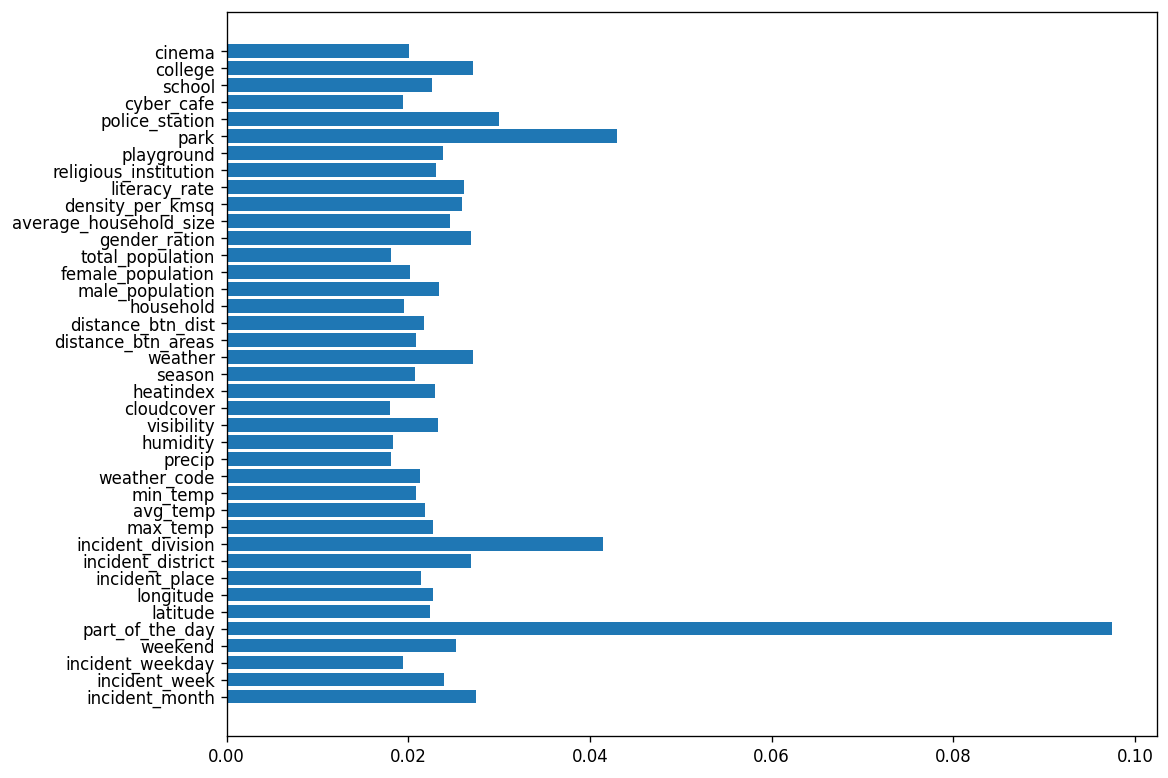

In [28]:
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators = 100,learning_rate=0.3,max_depth = 10)
classifier.fit(X_train, y_train)
print("Feature Importance:")
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=120)
plt.barh(X.columns, classifier.feature_importances_)

In [29]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[ 71  22   5  26  22  13]
 [ 12  83  13  17  17   7]
 [  8  12 110   7   4   5]
 [ 15  22   7  72  21  10]
 [ 16  18   9  24  77   6]
 [  7   2   7  11  11 122]]

Accuracy per Class:
Assault: 44.65408805031446
BodyFound: 55.70469798657718
Kidnap: 75.34246575342466
Murder: 48.97959183673469
Rape: 51.33333333333333
Robbery: 76.25

Accuracy: 0.59

Micro Precision: 0.59
Micro Recall: 0.59
Micro F1-score: 0.59

Macro Precision: 0.59
Macro Recall: 0.59
Macro F1-score: 0.59

Weighted Precision: 0.59
Weighted Recall: 0.59
Weighted F1-score: 0.59
Classification Report

              precision    recall  f1-score   support

     Assault       0.55      0.45      0.49       159
   BodyFound       0.52      0.56      0.54       149
      Kidnap       0.73      0.75      0.74       146
      Murder       0.46      0.49      0.47       147
        Rape       0.51      0.51      0.51       150
     Robbery       0.75      0.76      0.76       160

    accuracy  

### SVM

In [30]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()
from sklearn import svm

#### RBF

In [31]:
classifier_rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [32]:
y_pred = classifier_rbf.predict(X_test)
y_train_pred = classifier_rbf.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[ 32 119   0   4   0   4]
 [  4 136   2   6   1   0]
 [  1  91  51   3   0   0]
 [  2 113   0  30   2   0]
 [  2 105   1   4  37   1]
 [  3  74   0   6   2  75]]

Accuracy per Class:
Assault: 20.125786163522015
BodyFound: 91.2751677852349
Kidnap: 34.93150684931507
Murder: 20.408163265306122
Rape: 24.666666666666668
Robbery: 46.875

Accuracy: 0.40

Micro Precision: 0.40
Micro Recall: 0.40
Micro F1-score: 0.40

Macro Precision: 0.71
Macro Recall: 0.40
Macro F1-score: 0.41

Weighted Precision: 0.71
Weighted Recall: 0.40
Weighted F1-score: 0.41
Classification Report

              precision    recall  f1-score   support

     Assault       0.73      0.20      0.32       159
   BodyFound       0.21      0.91      0.35       149
      Kidnap       0.94      0.35      0.51       146
      Murder       0.57      0.20      0.30       147
        Rape       0.88      0.25      0.39       150
     Robbery       0.94      0.47      0.62       160

    accurac

#### Poly

In [33]:
classifier_poly = svm.SVC(kernel='poly', degree=10, C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [34]:
y_pred = classifier_poly.predict(X_test)
y_train_pred = classifier_poly.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[  9   5   6 133   5   1]
 [  8   7   9 110   8   7]
 [  3   3   9 125   5   1]
 [  4   1   4 123   5  10]
 [  6   3   2 128   5   6]
 [  3   2   1 119   8  27]]

Accuracy per Class:
Assault: 5.660377358490567
BodyFound: 4.697986577181208
Kidnap: 6.164383561643835
Murder: 83.6734693877551
Rape: 3.3333333333333335
Robbery: 16.875

Accuracy: 0.20

Micro Precision: 0.20
Micro Recall: 0.20
Micro F1-score: 0.20

Macro Precision: 0.29
Macro Recall: 0.20
Macro F1-score: 0.14

Weighted Precision: 0.29
Weighted Recall: 0.20
Weighted F1-score: 0.14
Classification Report

              precision    recall  f1-score   support

     Assault       0.27      0.06      0.09       159
   BodyFound       0.33      0.05      0.08       149
      Kidnap       0.29      0.06      0.10       146
      Murder       0.17      0.84      0.28       147
        Rape       0.14      0.03      0.05       150
     Robbery       0.52      0.17      0.25       160

    accuracy 

#### Sigmoid

In [35]:
classifier_sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [36]:
y_pred = classifier_sig.predict(X_test)
y_train_pred = classifier_sig.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[85  0  1  2 71  0]
 [73  1  0  0 75  0]
 [91  0  0  1 54  0]
 [58  0  4  0 85  0]
 [73  1  1  0 75  0]
 [65  2  1  0 92  0]]

Accuracy per Class:
Assault: 53.459119496855344
BodyFound: 0.6711409395973155
Kidnap: 0.0
Murder: 0.0
Rape: 50.0
Robbery: 0.0

Accuracy: 0.18

Micro Precision: 0.18
Micro Recall: 0.18
Micro F1-score: 0.18

Macro Precision: 0.10
Macro Recall: 0.17
Macro F1-score: 0.09

Weighted Precision: 0.10
Weighted Recall: 0.18
Weighted F1-score: 0.09
Classification Report

              precision    recall  f1-score   support

     Assault       0.19      0.53      0.28       159
   BodyFound       0.25      0.01      0.01       149
      Kidnap       0.00      0.00      0.00       146
      Murder       0.00      0.00      0.00       147
        Rape       0.17      0.50      0.25       150
     Robbery       0.00      0.00      0.00       160

    accuracy                           0.18       911
   macro avg       0.10      0.17    

/home/faisaltareque/anaconda3/envs/PythonEnv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/faisaltareque/anaconda3/envs/PythonEnv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/faisaltareque/anaconda3/envs/PythonEnv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(

#### Linear

In [37]:
# classifier_linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [38]:
# y_pred = classifier_linear.predict(X_test)
# y_train_pred = classifier_linear.predict(X_train)
# print("Test Performance: \n")
# ModelPerformance(y_test,y_pred)
# print("\nTrain Performance: \n")
# ModelPerformance(y_train,y_train_pred)

### Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [40]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[ 5  1 21 67 39 26]
 [ 0  2 40 55 22 30]
 [ 4  0 43 60 21 18]
 [ 5  1 20 80 25 16]
 [ 1  1 36 67 26 19]
 [ 3  0 19 78 20 40]]

Accuracy per Class:
Assault: 3.1446540880503147
BodyFound: 1.342281879194631
Kidnap: 29.45205479452055
Murder: 54.421768707483
Rape: 17.333333333333336
Robbery: 25.0

Accuracy: 0.22

Micro Precision: 0.22
Micro Recall: 0.22
Micro F1-score: 0.22

Macro Precision: 0.26
Macro Recall: 0.22
Macro F1-score: 0.18

Weighted Precision: 0.26
Weighted Recall: 0.22
Weighted F1-score: 0.18
Classification Report

              precision    recall  f1-score   support

     Assault       0.28      0.03      0.06       159
   BodyFound       0.40      0.01      0.03       149
      Kidnap       0.24      0.29      0.26       146
      Murder       0.20      0.54      0.29       147
        Rape       0.17      0.17      0.17       150
     Robbery       0.27      0.25      0.26       160

    accuracy                           0.22       9

### Decision Tree

Feature Importance:


<BarContainer object of 39 artists>

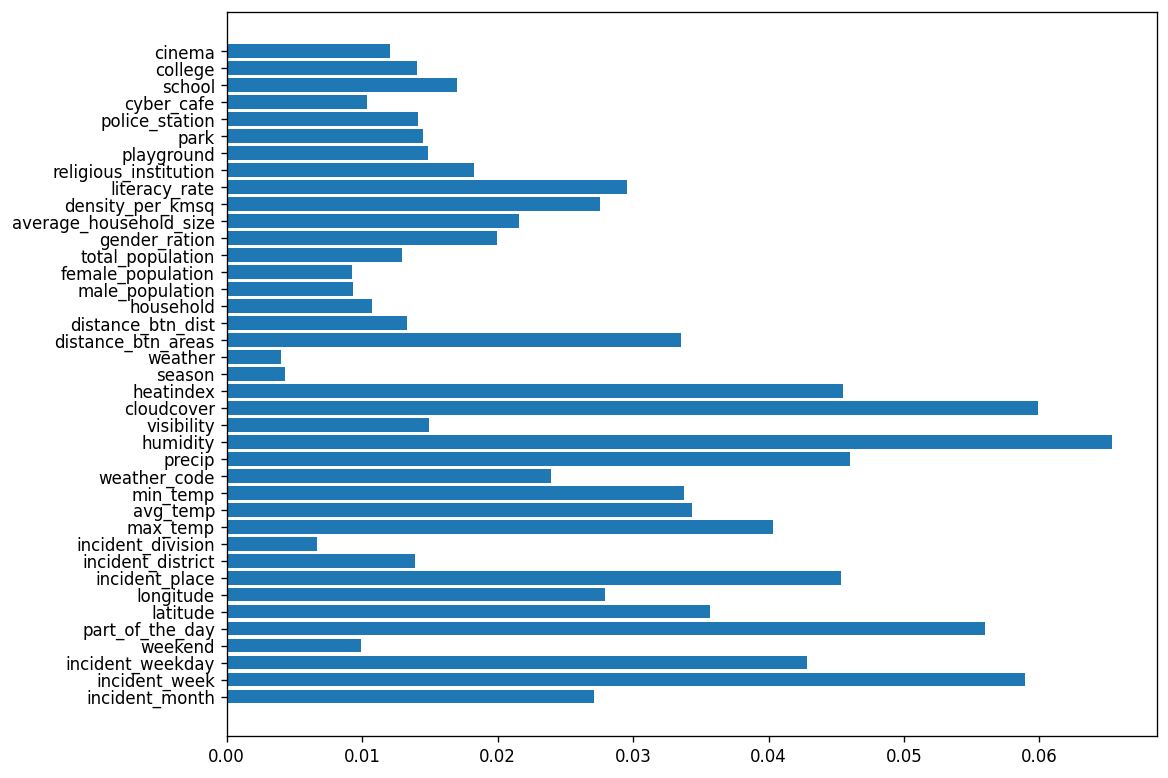

In [41]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 20,criterion = 'gini')
classifier.fit(X_train, y_train)
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=120)
print("Feature Importance:")
plt.barh(X.columns, classifier.feature_importances_)

In [42]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[58 23 18 25 19 16]
 [30 54 20 16 21  8]
 [13 14 85 11 12 11]
 [18 17  8 67 26 11]
 [21 22  9 20 60 18]
 [14  9 13 18 11 95]]

Accuracy per Class:
Assault: 36.477987421383645
BodyFound: 36.241610738255034
Kidnap: 58.21917808219178
Murder: 45.57823129251701
Rape: 40.0
Robbery: 59.375

Accuracy: 0.46

Micro Precision: 0.46
Micro Recall: 0.46
Micro F1-score: 0.46

Macro Precision: 0.46
Macro Recall: 0.46
Macro F1-score: 0.46

Weighted Precision: 0.46
Weighted Recall: 0.46
Weighted F1-score: 0.46
Classification Report

              precision    recall  f1-score   support

     Assault       0.38      0.36      0.37       159
   BodyFound       0.39      0.36      0.38       149
      Kidnap       0.56      0.58      0.57       146
      Murder       0.43      0.46      0.44       147
        Rape       0.40      0.40      0.40       150
     Robbery       0.60      0.59      0.60       160

    accuracy                           0.46       911
   mac

### Ada-Boost

In [43]:
classifier = AdaBoostClassifier(n_estimators=50, learning_rate=1)
classifier.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1)

In [44]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[23 19 22 32 25 38]
 [17 46 29 15 13 29]
 [11 20 71 17 12 15]
 [15 20 13 51 21 27]
 [16 14 13 31 36 40]
 [ 8  8  7 24 19 94]]

Accuracy per Class:
Assault: 14.465408805031446
BodyFound: 30.87248322147651
Kidnap: 48.63013698630137
Murder: 34.69387755102041
Rape: 24.0
Robbery: 58.75

Accuracy: 0.35

Micro Precision: 0.35
Micro Recall: 0.35
Micro F1-score: 0.35

Macro Precision: 0.34
Macro Recall: 0.35
Macro F1-score: 0.34

Weighted Precision: 0.34
Weighted Recall: 0.35
Weighted F1-score: 0.34
Classification Report

              precision    recall  f1-score   support

     Assault       0.26      0.14      0.18       159
   BodyFound       0.36      0.31      0.33       149
      Kidnap       0.46      0.49      0.47       146
      Murder       0.30      0.35      0.32       147
        Rape       0.29      0.24      0.26       150
     Robbery       0.39      0.59      0.47       160

    accuracy                           0.35       911
   macro

### Extra-Tree

In [45]:
classifier = ExtraTreesClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)

ExtraTreesClassifier(random_state=0)

In [46]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[ 79  17   7  26  16  14]
 [ 18  65  19  23  16   8]
 [  5  12 110   8   6   5]
 [ 17  17   8  76  17  12]
 [ 17  19   7  24  78   5]
 [  6   2   2  14   9 127]]

Accuracy per Class:
Assault: 49.685534591194966
BodyFound: 43.624161073825505
Kidnap: 75.34246575342466
Murder: 51.70068027210885
Rape: 52.0
Robbery: 79.375

Accuracy: 0.59

Micro Precision: 0.59
Micro Recall: 0.59
Micro F1-score: 0.59

Macro Precision: 0.58
Macro Recall: 0.59
Macro F1-score: 0.58

Weighted Precision: 0.59
Weighted Recall: 0.59
Weighted F1-score: 0.59
Classification Report

              precision    recall  f1-score   support

     Assault       0.56      0.50      0.52       159
   BodyFound       0.49      0.44      0.46       149
      Kidnap       0.72      0.75      0.74       146
      Murder       0.44      0.52      0.48       147
        Rape       0.55      0.52      0.53       150
     Robbery       0.74      0.79      0.77       160

    accuracy            